In [22]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv, pinv, norm
from scipy.io import loadmat
import random

In [28]:
def multi_variate_regression(x, y, x_test, y_test, lambd):
    xTx = x.T.dot(x) + lambd*np.identity(x.shape[-1])
    xTx_inv = inv(xTx)
#     print(xTx_inv.shape, x.T.dot(y).shape)
    model_param = xTx_inv.dot(x.T).dot(y)
    model_param_norm = norm(model_param)
    train_error = (0.5/x.shape[0])*np.sum(np.power(y - x.dot(model_param), 2)) + lambd/(2*x.shape[0])*model_param_norm*model_param_norm
    test_error = (0.5/x_test.shape[0])*np.sum(np.power(y_test - x_test.dot(model_param), 2)) + lambd/(2*x_test.shape[0])*model_param_norm*model_param_norm
    
    return train_error, test_error

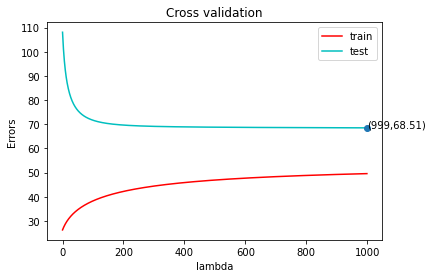

In [43]:
dataset = loadmat("problem2.mat")
items = list(dataset.items())  # List of tuples of (key,values)
random.shuffle(items)

size_of_train = int(dataset['x'].shape[0])
size_of_train = int(size_of_train*0.5)

x, y = dataset['x'], dataset['y'] 
x_train, y_train = x[:size_of_train], y[:size_of_train]
x_test, y_test = x[size_of_train:], y[size_of_train:]

errors = [multi_variate_regression(x_train, y_train, x_test, y_test, lambd) for lambd in range(1000)]

train_errors = [e[0] for e in errors]
test_errors = [e[1] for e in errors]

min_idx = np.argmin(test_errors)

plt_train, = plt.plot(range(1000), train_errors,'r',label='train')
plt_test,  = plt.plot(range(1000), test_errors, 'c',label='test')
plt.xlabel('lambda')
plt.ylabel('Errors')
plt.title('Cross validation')
plt.plot(min_idx, test_errors[min_idx], 'o')
plt.text(min_idx, test_errors[min_idx], "({},{})".format(str(min_idx), '%.2f'%test_errors[min_idx]))
plt.legend(handles=[plt_train, plt_test])
plt.show()

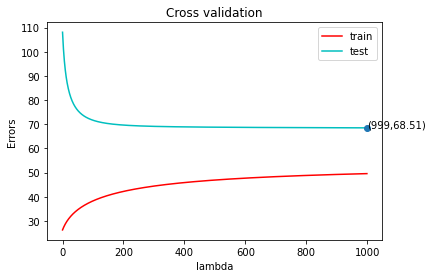

In [44]:
errs = [multi_variate_regression(x_test, y_test, x_train, y_train, lambd) for lambd in range(1000)]

train_errors = [e[0] for e in errors]
test_errors = [e[1] for e in errors]

min_idx = np.argmin(test_errors)

plt_train, = plt.plot(range(1000), train_errors,'r',label='train')
plt_test,  = plt.plot(range(1000), test_errors, 'c',label='test')
plt.xlabel('lambda')
plt.ylabel('Errors')
plt.title('Cross validation')
plt.plot(min_idx, test_errors[min_idx], 'o')
plt.text(min_idx, test_errors[min_idx], "({},{})".format(str(min_idx), '%.2f'%test_errors[min_idx]))
plt.legend(handles=[plt_train, plt_test])
plt.show()